In [1]:
# Download the dataset
!gdown --id  1eADu_WmxwhBVwZX4AGKPdkw17bOToP99


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eADu_WmxwhBVwZX4AGKPdkw17bOToP99
To: /content/dataset_256X256.zip
100% 365M/365M [00:05<00:00, 61.8MB/s]


In [3]:
from zipfile import ZipFile
with ZipFile('/content/dataset_256X256.zip', 'r') as zipObj:
  zipObj.extractall('data')

### Prepare the ImageDataGenerator

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
TRAINING_DIR = "/content/data/dataset_256X256/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/data/dataset_256X256/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=40
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=40
)

Found 4800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/model_1-{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint_1 = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

### Model 1:


In [25]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

base_model = InceptionV3(
    input_shape = (256,256,3),
    weights = 'imagenet',
    include_top = False
)

for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation = 'softmax')(x)
model1 = Model(inputs= base_model.inputs, outputs = predictions)

In [26]:
model1.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [27]:
history1 = model1.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5, callbacks = [checkpoint_1]
)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9133
Epoch 1: val_accuracy improved from -inf to 0.96625, saving model to /content/model_1-01-0.9663.hdf5
120/120 [==============================] - 93s 726ms/step - loss: 0.2536 - accuracy: 0.9133 - val_loss: 0.0906 - val_accuracy: 0.9663
Epoch 2/5
120/120 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9660
Epoch 2: val_accuracy improved from 0.96625 to 0.97500, saving model to /content/model_1-02-0.9750.hdf5
120/120 [==============================] - 84s 699ms/step - loss: 0.0973 - accuracy: 0.9660 - val_loss: 0.0658 - val_accuracy: 0.9750
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9717
Epoch 3: val_accuracy improved from 0.97500 to 0.97938, saving model to /content/model_1-03-0.9794.hdf5
120/120 [==============================] - 88s 735ms/step - loss: 0.0807 - accuracy: 0.9717 - val_loss: 0.0523 - val_accuracy: 0.9794
Epoc

### Model 2:

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

base_model = VGG16(
    input_shape = (256,256,3),
    weights = 'imagenet',
    include_top = False
)

for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation = 'softmax')(x)
model2 = Model(inputs= base_model.inputs, outputs = predictions)

In [29]:
model2.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/model_2-{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint_2 = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [31]:
history2 = model2.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5, callbacks = [checkpoint_2]
)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.7439 - accuracy: 0.7013
Epoch 1: val_accuracy improved from -inf to 0.88625, saving model to /content/model_2-01-0.8863.hdf5
120/120 [==============================] - 101s 831ms/step - loss: 0.7439 - accuracy: 0.7013 - val_loss: 0.3504 - val_accuracy: 0.8863
Epoch 2/5
120/120 [==============================] - ETA: 0s - loss: 0.4333 - accuracy: 0.8394
Epoch 2: val_accuracy did not improve from 0.88625
120/120 [==============================] - 91s 757ms/step - loss: 0.4333 - accuracy: 0.8394 - val_loss: 0.3117 - val_accuracy: 0.8794
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8569
Epoch 3: val_accuracy improved from 0.88625 to 0.90875, saving model to /content/model_2-03-0.9087.hdf5
120/120 [==============================] - 91s 761ms/step - loss: 0.3671 - accuracy: 0.8569 - val_loss: 0.2362 - val_accuracy: 0.9087
Epoch 4/5
120/120 [==============================] - ETA

### Plotting matrices

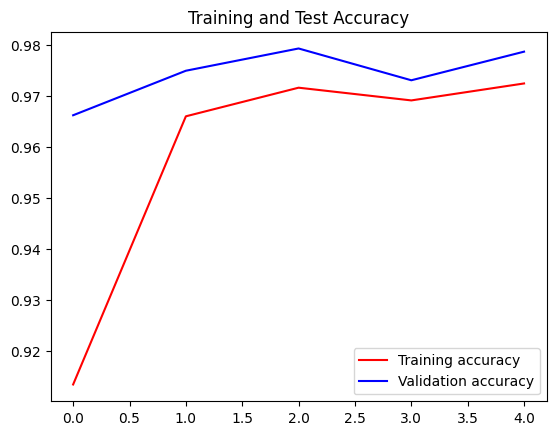

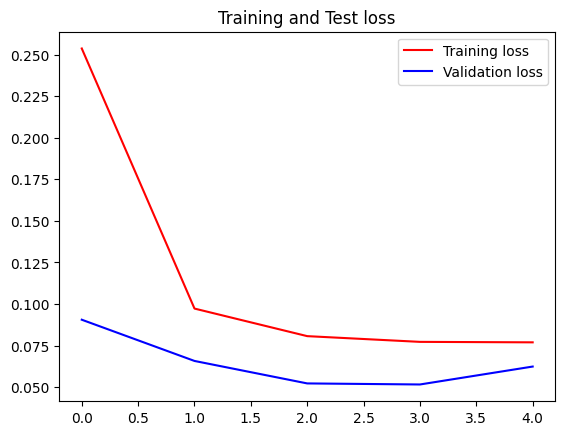

In [32]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Test loss")
plt.legend()

plt.show()

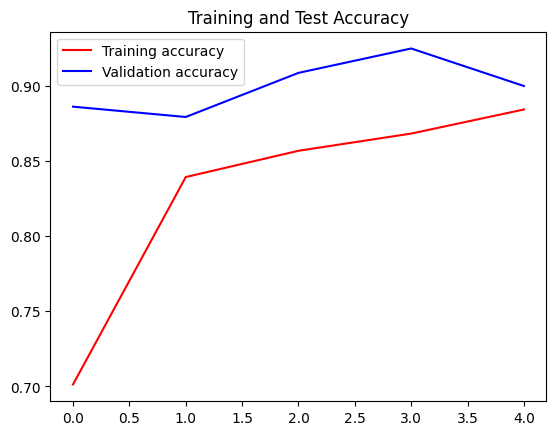

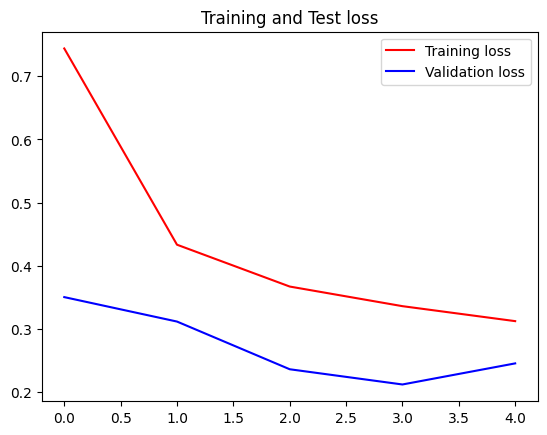

In [33]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Test loss")
plt.legend()

plt.show()

### Ensemble Model

In [34]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

model_1 = load_model('/content/model_1-03-0.9794.hdf5')
model_1 = Model(inputs = model_1.inputs,
                outputs = model_1.outputs,
                name = 'name_of_model_1')


model_2 = load_model('/content/model_2-04-0.9250.hdf5')
model_2 = Model(inputs = model_2.inputs,
                outputs = model_2.outputs,
                name = 'name_of_model_2')

models = [model_1, model_2]
model_input = Input(shape = (256,256,3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs = model_input,
                outputs = ensemble_output,
                name = 'ensemble')



In [35]:
ensemble_model.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = '/content/ensemble_model-{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    verbose = 1
)

In [38]:
history = ensemble_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5, callbacks = [checkpoint]
)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.1585 - accuracy: 0.9663
Epoch 1: val_accuracy improved from -inf to 0.97438, saving model to /content/ensemble_model-01-0.9744.hdf5
120/120 [==============================] - 112s 882ms/step - loss: 0.1585 - accuracy: 0.9663 - val_loss: 0.1042 - val_accuracy: 0.9744
Epoch 2/5
120/120 [==============================] - ETA: 0s - loss: 0.1443 - accuracy: 0.9700
Epoch 2: val_accuracy improved from 0.97438 to 0.98000, saving model to /content/ensemble_model-02-0.9800.hdf5
120/120 [==============================] - 103s 856ms/step - loss: 0.1443 - accuracy: 0.9700 - val_loss: 0.0996 - val_accuracy: 0.9800
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9719
Epoch 3: val_accuracy did not improve from 0.98000
120/120 [==============================] - 101s 842ms/step - loss: 0.1353 - accuracy: 0.9719 - val_loss: 0.0956 - val_accuracy: 0.9787
Epoch 4/5
120/120 [=====================

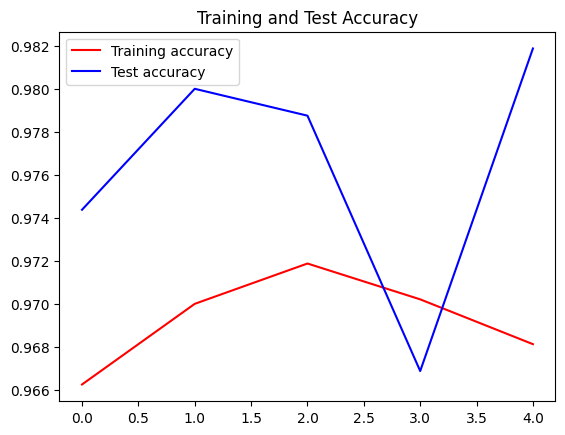

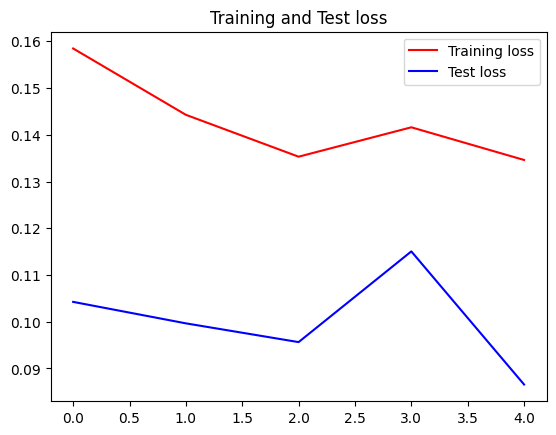

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Test accuracy')
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Test loss')
plt.title("Training and Test loss")
plt.legend()

plt.show()